Download Anaconda Navigator for Jupiter Notebook
https://www.anaconda.com/download


In [55]:
# Basic data manipulation
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Load the dataset with ; as separator
data = pd.read_csv(r"C:\Users\Haseeb Batcha\Desktop\Assignment\StudentsPerformance.csv")

# View first few records
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [57]:
# Basic info about dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [58]:
# Check for missing values
data.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [59]:
data.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [60]:
# Average score
data['average_score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3

# Create binary target: pass if avg_score >= 50
data['pass'] = data['average_score'].apply(lambda x: 1 if x >= 50 else 0)


In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
# Encode categorical features
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])


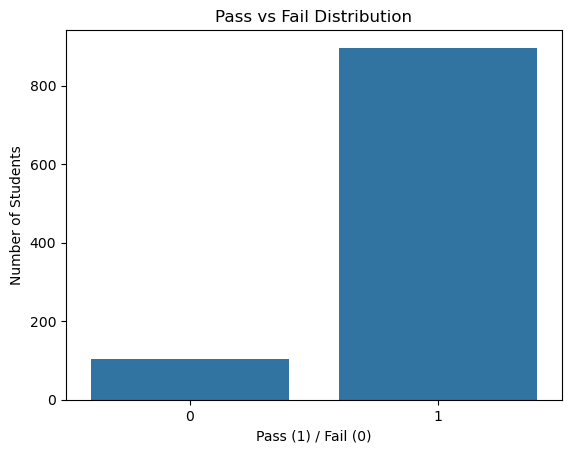

In [63]:
sns.countplot(x='pass', data=data)
plt.title("Pass vs Fail Distribution")
plt.xlabel("Pass (1) / Fail (0)")
plt.ylabel("Number of Students")
plt.show()


pass
1    897
0    103
Name: count, dtype: int64


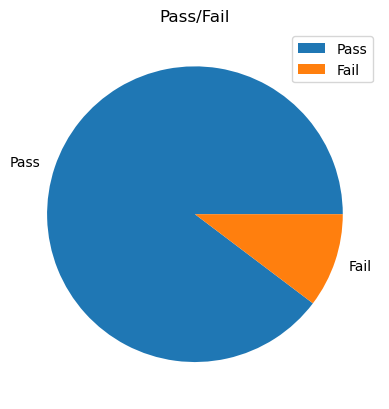

In [64]:
#What is the distribution of the students who are pass/fail
print(data['pass'].value_counts())
plt.pie(data['pass'].value_counts(),labels=['Pass','Fail'])
plt.title('Pass/Fail')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Race/Ethnicity')

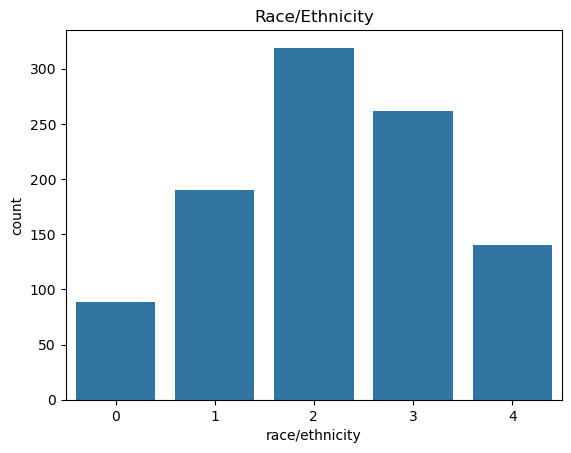

In [65]:
#What is the distribution of Race or Ethnicity for the students?
sns.countplot(x='race/ethnicity',data=data)

plt.title('Race/Ethnicity')

Text(0.5, 1.0, 'Gender distribution among students with respect to Pass/Fail')

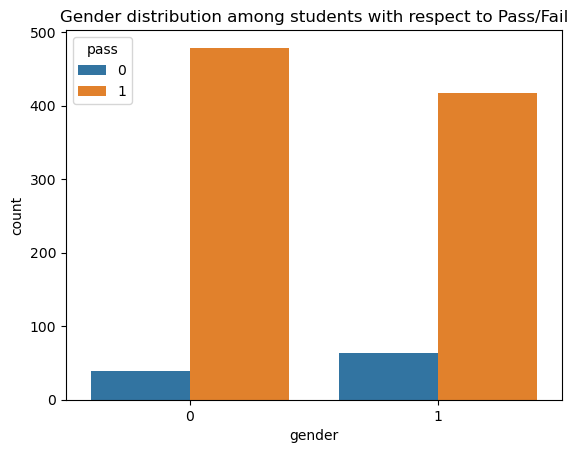

In [66]:
#What is the gender distribution among students with respect to Pass/Fail?
sns.countplot(x='gender',hue='pass',data=data)
plt.title('Gender distribution among students with respect to Pass/Fail')

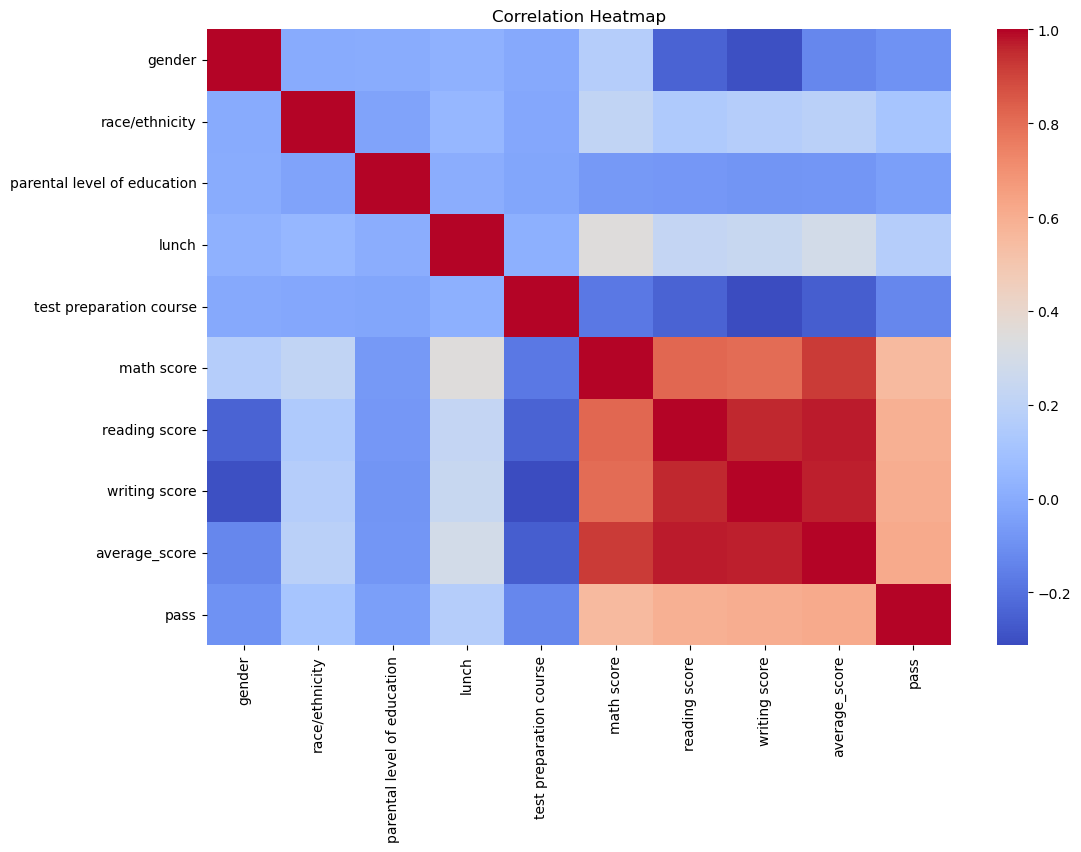

In [67]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


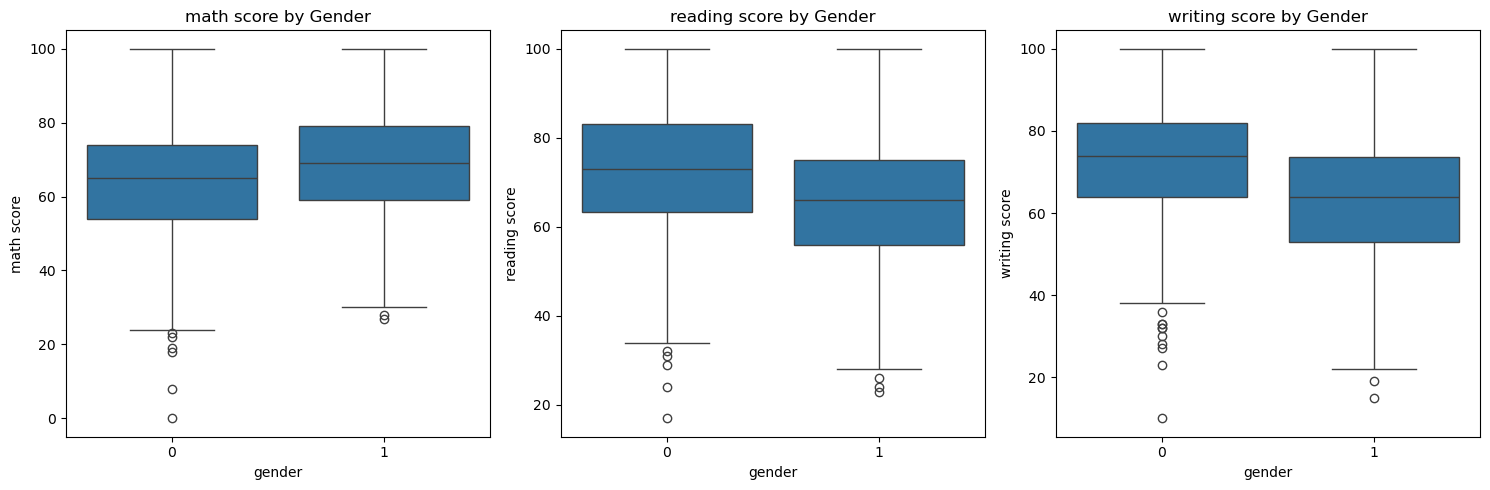

In [68]:
# Boxplot of scores by gender
plt.figure(figsize=(15, 5))
for i, subject in enumerate(["math score", "reading score", "writing score"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='gender', y=subject, data=data)
    plt.title(f"{subject} by Gender")
plt.tight_layout()
plt.show()


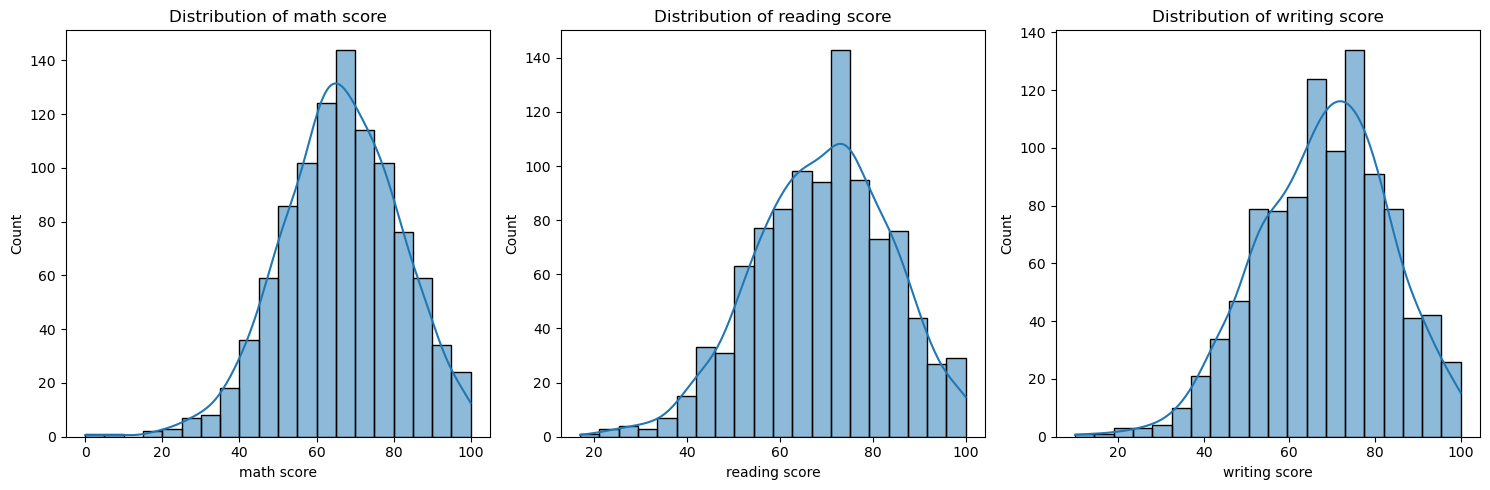

In [69]:
# Histogram for scores
plt.figure(figsize=(15, 5))
for i, subject in enumerate(["math score", "reading score", "writing score"]):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[subject], kde=True, bins=20)
    plt.title(f"Distribution of {subject}")
plt.tight_layout()
plt.show()


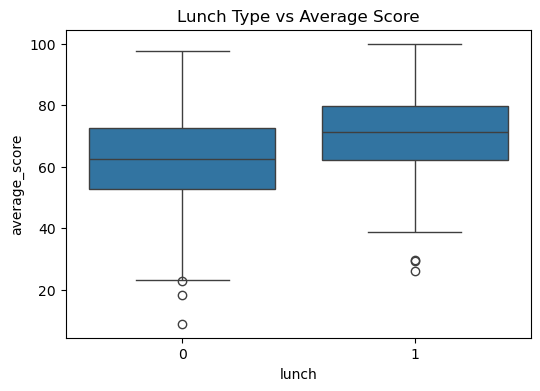

In [70]:
#Lunch Type VS Performance
plt.figure(figsize=(6, 4))
sns.boxplot(x='lunch', y='average_score', data=data)
plt.title("Lunch Type vs Average Score")
plt.show()


In [71]:
# Drop unnecessary columns
x = data.drop(['average_score', 'pass'], axis=1)
y = data['pass']


Model Building

In [72]:
# For model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [73]:
#Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Logistic Regression

In [74]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)


Random Forest

In [75]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [76]:
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression
Accuracy: 1.0
Confusion Matrix:
 [[ 27   0]
 [  0 173]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       173

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [77]:
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest
Accuracy: 0.995
Confusion Matrix:
 [[ 26   1]
 [  0 173]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.99      1.00      1.00       173

    accuracy                           0.99       200
   macro avg       1.00      0.98      0.99       200
weighted avg       1.00      0.99      0.99       200



In [78]:
# Evaluate models
models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model
   
}

In [79]:
# Print accuracy of each model
for name, model in models.items():
    y_pred = model.predict(x_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Logistic Regression Accuracy: 1.0000
Random Forest Accuracy: 0.9950
